In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import src.data_utils as data_utils
import src.tree_build as dt_tree
import src.heurestics as dt_heur
import src.tree_utils as tree_utils
import src.dt_testing_utils as dt_testing
import src.tree_pruning as tree_pruning

from pprint import pprint
import numpy as np
import pandas as pd
from sklearn.utils import resample

## Utils

In [3]:
def print_tree_informations(tree, training_data, testing_data):
    accuracy_testing = tree_utils.tree_accuracy(testing_data, tree)
    accuracy_training = tree_utils.tree_accuracy(training_data, tree)
    levels = tree_utils.number_of_levels(tree)
    leafs = tree_utils.number_of_leafs(tree)
    print("Accuracy for: testing {0:.2f}% | training {1:.2f}% | levels {2} | leafs {3}".format(accuracy_testing, accuracy_training,levels, leafs))

In [4]:
#heuristics
def train_and_prune_tree(heurestic, training_data, testing_data, validation_data):
    print("Before Pruning - heuristic = {0}".format(heurestic.__name__))
    trained_tree = dt_tree.build_tree_generic(heurestic, training_data)
    print_tree_informations(trained_tree, training_data, testing_data)
#     pprint(trained_tree)
    print("After Pruning:")
    pruned_trained_tree = tree_pruning.reduced_error_pruning(trained_tree, validation_data)
    print_tree_informations(pruned_trained_tree, training_data, testing_data)
    print('\n')
#     pprint(pruned_trained_tree)

In [5]:
default_heuristics = [dt_heur.gini_impurity_weighted, dt_heur.info_gain, dt_heur.information_gain_ratio,
                      dt_heur.distance_measure, dt_heur.j_measure, dt_heur.weight_of_evidence,
                      dt_heur.gini_pri, dt_heur.relief, dt_heur.relevance, dt_heur.mdl_simple]

def train_tree_for_different_heuristics(training_data, testing_data, validation_data, heuristics = default_heuristics):
    for heuristic in heuristics:
        train_and_prune_tree(heuristic, training_data, testing_data, validation_data)

# Car dataset

## Dataset preparation

In [6]:
car_dataset_path = 'data/car.data'
car_dataset_labels = ['buying','maint','doors','persons','lug_boot','safety','CLASS']
car_dataset = data_utils.preapare_dataset(car_dataset_path, car_dataset_labels)
car_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,CLASS
0,vhigh,low,3,more,small,high,acc
1,vhigh,vhigh,3,4,med,high,unacc
2,med,low,5more,more,small,low,unacc
3,low,low,2,more,big,low,unacc
4,high,med,4,4,small,med,unacc


### Car 70%

unacc    560
acc      186
vgood     33
good      26
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

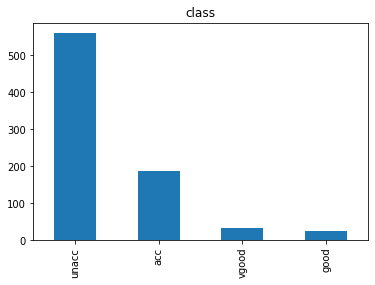

In [7]:
car_set_for_training70, car_testing70 = data_utils.data_split(car_dataset, 70)
car_training70, car_validation70 = data_utils.split_training_data_for_pruning(car_set_for_training70)
print(car_training70['CLASS'].value_counts())
car_training70['CLASS'].value_counts().plot(kind='bar', title='class')

In [8]:
# car_training

186


<AxesSubplot:title={'center':'class'}>

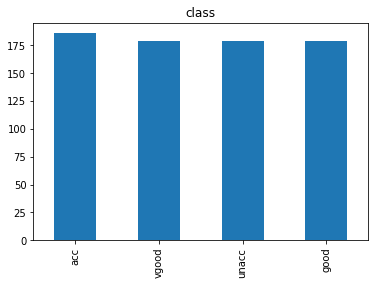

In [9]:
#Target for all 174
resampling_car70 = car_training70.copy()
unacc_part70 = resampling_car70[resampling_car70['CLASS'] == 'unacc']
acc_part70 = resampling_car70[resampling_car70['CLASS'] == 'acc'] 
print(len(acc_part70))
vgood_part70 = resampling_car70[resampling_car70['CLASS'] == 'vgood'] 
good_part70 = resampling_car70[resampling_car70['CLASS'] == 'good'] 


unacc_downsample70 = resample(unacc_part70, 
                                 replace=False,     
                                 n_samples=179)

vgood_part_upsampled70 = resample(vgood_part70, 
                                 replace=True,     
                                 n_samples=179)
good_part_upsampled70 = resample(good_part70, 
                                 replace=True,     
                                 n_samples=179)

# Combine majority class with upsamplet minority class
balanced_car_training70 = pd.concat([unacc_downsample70, acc_part70, vgood_part_upsampled70, good_part_upsampled70])
balanced_car_training70 = balanced_car_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training70 = balanced_car_training70.sample(frac=1).reset_index(drop=True)

car_training70 = balanced_car_training70.copy()
car_training70['CLASS'].value_counts().plot(kind='bar', title='class')

In [10]:
car_training70.head()

,buying,maint,doors,persons,lug_boot,safety,CLASS
0,med,med,4,more,med,med,acc
1,vhigh,med,3,4,big,high,acc
2,high,low,5more,2,med,med,unacc
3,med,med,4,2,big,low,unacc
4,high,high,3,4,med,high,acc


### Dataset 80%

unacc    644
acc      209
vgood     36
good      32
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

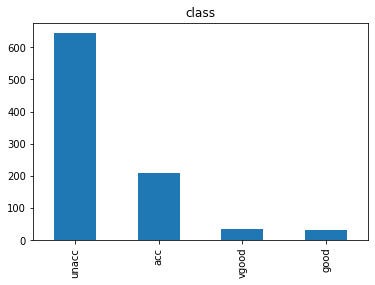

In [11]:
car_set_for_training80, car_testing80 = data_utils.data_split(car_dataset, 80)
car_training80, car_validation80 = data_utils.split_training_data_for_pruning(car_set_for_training80)
print(car_training80['CLASS'].value_counts())
car_training80['CLASS'].value_counts().plot(kind='bar', title='class')

In [12]:
# car_training80

<AxesSubplot:title={'center':'class'}>

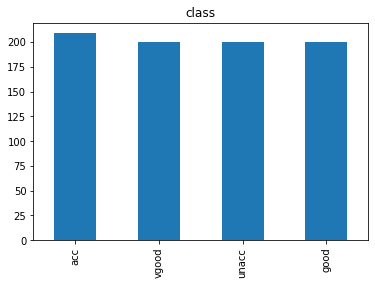

In [13]:
#Target for all 318
resampling_car80 = car_training80.copy()
unacc_part80 = resampling_car80[resampling_car80['CLASS'] == 'unacc']
acc_part80 = resampling_car80[resampling_car80['CLASS'] == 'acc'] 
vgood_part80 = resampling_car80[resampling_car80['CLASS'] == 'vgood'] 
good_part80 = resampling_car80[resampling_car80['CLASS'] == 'good'] 


unacc_downsample80 = resample(unacc_part80, 
                                 replace=False,     
                                 n_samples=200)

vgood_part_upsampled80 = resample(vgood_part80, 
                                 replace=True,     
                                 n_samples=200)
good_part_upsampled80 = resample(good_part80, 
                                 replace=True,     
                                 n_samples=200)

# Combine majority class with upsamplet minority class
balanced_car_training80 = pd.concat([unacc_downsample80, acc_part80, vgood_part_upsampled80, good_part_upsampled80])
balanced_car_training80 = balanced_car_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training80 = balanced_car_training80.sample(frac=1).reset_index(drop=True)

car_training80 = balanced_car_training80.copy()
car_training80['CLASS'].value_counts().plot(kind='bar', title='class')

In [14]:
# car_training80.head()

### Dataset 90%

unacc    728
acc      230
vgood     44
good      34
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

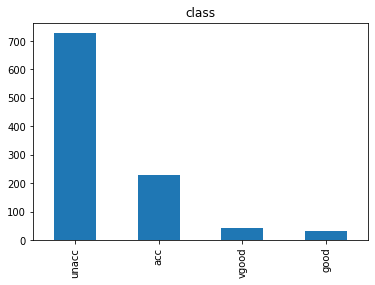

In [15]:
car_set_for_training90, car_testing90 = data_utils.data_split(car_dataset, 90)
car_training90, car_validation90 = data_utils.split_training_data_for_pruning(car_set_for_training90)
print(car_training90['CLASS'].value_counts())
car_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

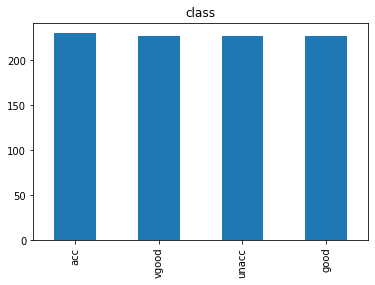

In [16]:
#Target for all 352?
resampling_car90 = car_training90.copy()
unacc_part90 = resampling_car90[resampling_car90['CLASS'] == 'unacc']
acc_part90 = resampling_car90[resampling_car90['CLASS'] == 'acc']
vgood_part90 = resampling_car90[resampling_car90['CLASS'] == 'vgood'] 
good_part90 = resampling_car90[resampling_car90['CLASS'] == 'good'] 


unacc_downsample90 = resample(unacc_part90, 
                                 replace=False,     
                                 n_samples=227)

vgood_part_upsampled90 = resample(vgood_part90, 
                                 replace=True,     
                                 n_samples=227)
good_part_upsampled90 = resample(good_part90, 
                                 replace=True,     
                                 n_samples=227)

# Combine majority class with upsamplet minority class
balanced_car_training90 = pd.concat([unacc_downsample90, acc_part90, vgood_part_upsampled90, good_part_upsampled90])
balanced_car_training90 = balanced_car_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training90 = balanced_car_training90.sample(frac=1).reset_index(drop=True)

car_training90 = balanced_car_training90.copy()
car_training90['CLASS'].value_counts().plot(kind='bar', title='class')

In [17]:
# car_training90

## Model Training

In [18]:
train_tree_for_different_heuristics(car_training70, car_testing70, car_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 80.15% | training 96.27% | levels 10 | leafs 93
After Pruning:
Accuracy for: testing 80.73% | training 92.95% | levels 10 | leafs 73


Before Pruning - heuristic = info_gain
Accuracy for: testing 80.73% | training 96.27% | levels 10 | leafs 90
After Pruning:
Accuracy for: testing 81.12% | training 90.73% | levels 10 | leafs 64


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 80.35% | training 96.96% | levels 10 | leafs 110
After Pruning:
Accuracy for: testing 80.54% | training 94.19% | levels 10 | leafs 95


Before Pruning - heuristic = distance_measure
Accuracy for: testing 60.31% | training 76.49% | levels 10 | leafs 161
After Pruning:
Accuracy for: testing 63.01% | training 60.44% | levels 10 | leafs 94


Before Pruning - heuristic = j_measure
Accuracy for: testing 81.31% | training 96.27% | levels 10 | leafs 90
After Pruning:
Accuracy for: testing 81.31% | training 90.87% | levels 1

In [19]:
train_tree_for_different_heuristics(car_training80, car_testing80, car_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 86.71% | training 97.03% | levels 10 | leafs 112
After Pruning:
Accuracy for: testing 87.28% | training 96.29% | levels 10 | leafs 105


Before Pruning - heuristic = info_gain
Accuracy for: testing 86.99% | training 96.91% | levels 10 | leafs 110
After Pruning:
Accuracy for: testing 87.57% | training 96.17% | levels 10 | leafs 103


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 83.53% | training 96.29% | levels 10 | leafs 117
After Pruning:
Accuracy for: testing 83.82% | training 95.92% | levels 10 | leafs 112


Before Pruning - heuristic = distance_measure
Accuracy for: testing 52.31% | training 74.78% | levels 10 | leafs 173
After Pruning:
Accuracy for: testing 53.47% | training 69.84% | levels 10 | leafs 149


Before Pruning - heuristic = j_measure
Accuracy for: testing 87.86% | training 96.91% | levels 10 | leafs 111
After Pruning:
Accuracy for: testing 87.86% | training 96.29% | l

In [20]:
train_tree_for_different_heuristics(car_training90, car_testing90, car_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 80.35% | training 96.49% | levels 10 | leafs 114
After Pruning:
Accuracy for: testing 80.35% | training 96.05% | levels 10 | leafs 107


Before Pruning - heuristic = info_gain
Accuracy for: testing 79.77% | training 96.16% | levels 10 | leafs 116
After Pruning:
Accuracy for: testing 79.77% | training 95.72% | levels 10 | leafs 109


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 76.88% | training 96.38% | levels 10 | leafs 124
After Pruning:
Accuracy for: testing 76.30% | training 96.05% | levels 10 | leafs 118


Before Pruning - heuristic = distance_measure
Accuracy for: testing 56.07% | training 74.31% | levels 10 | leafs 191
After Pruning:
Accuracy for: testing 61.27% | training 66.41% | levels 10 | leafs 136


Before Pruning - heuristic = j_measure
Accuracy for: testing 79.77% | training 96.16% | levels 10 | leafs 116
After Pruning:
Accuracy for: testing 79.77% | training 95.72% | l

# Cancer Dataset

# Dataset preparation

In [21]:
cancer_dataset_path = 'data/breast-cancer.data'
cancer_dataset_labels = ['CLASS','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast', 'breast-quad', 'irradiat']
cancer_dataset = data_utils.preapare_dataset(cancer_dataset_path, cancer_dataset_labels)
cancer_dataset = cancer_dataset[['age','menopause','tumor-size','inv-nodes', 'node-caps','deg-malig','breast', 'breast-quad', 'irradiat', 'CLASS']]
# cancer_dataset.head()
cancer_dataset

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,CLASS
0,50-59,ge40,20-24,0-2,no,3,left,left_up,no,no-recurrence-events
1,50-59,lt40,15-19,0-2,no,2,left,left_low,no,no-recurrence-events
2,70-79,ge40,0-4,0-2,no,1,left,right_low,no,no-recurrence-events
3,30-39,premeno,30-34,0-2,no,1,right,left_up,no,recurrence-events
4,40-49,premeno,30-34,0-2,no,1,right,left_up,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,40-49,premeno,20-24,3-5,no,2,right,left_up,no,no-recurrence-events
282,60-69,ge40,30-34,3-5,yes,2,left,central,yes,recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,60-69,ge40,20-24,0-2,no,3,right,left_low,no,recurrence-events


### Cancer 70%

no-recurrence-events    94
recurrence-events       39
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

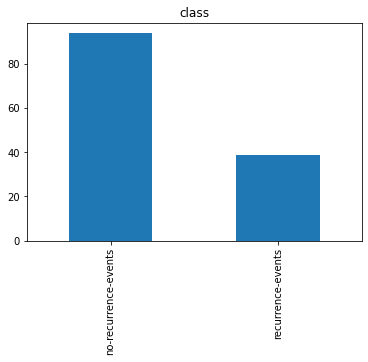

In [22]:
cancer_set_for_training70, cancer_testing70 = data_utils.data_split(cancer_dataset, 70)
cancer_training70, cancer_validation70 = data_utils.split_training_data_for_pruning(cancer_set_for_training70)
print(cancer_training70['CLASS'].value_counts())
cancer_training70['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

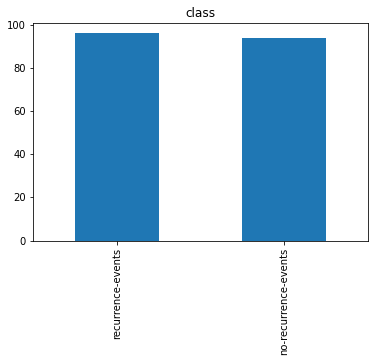

In [23]:
#Target for all 174
resampling_cancer70 = cancer_training70.copy()
recurrence_events_part70 = resampling_cancer70[resampling_cancer70['CLASS'] == 'recurrence-events']
no_recurrence_events_part70 = resampling_cancer70[resampling_cancer70['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled70 = resample(recurrence_events_part70, 
                                 replace=True,     
                                 n_samples=96)

# Combine majority class with upsamplet minority class
balanced_cnacer_training70 = pd.concat([recurrence_events_part_upsampled70, no_recurrence_events_part70])
balanced_cnacer_training70 = balanced_cnacer_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training70 = balanced_cnacer_training70.sample(frac=1).reset_index(drop=True)

cancer_training70 = balanced_cnacer_training70.copy()
cancer_training70['CLASS'].value_counts().plot(kind='bar', title='class')

### Cancer 80%

no-recurrence-events    104
recurrence-events        47
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

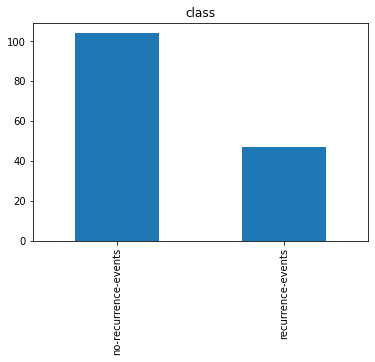

In [24]:
cancer_set_for_training80, cancer_testing80 = data_utils.data_split(cancer_dataset, 80)
cancer_training80, cancer_validation80 = data_utils.split_training_data_for_pruning(cancer_set_for_training80)
print(cancer_training80['CLASS'].value_counts())
cancer_training80['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

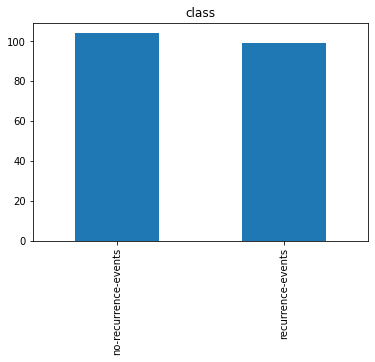

In [25]:
#Target for all 174
resampling_cancer80 = cancer_training80.copy()
recurrence_events_part80 = resampling_cancer80[resampling_cancer80['CLASS'] == 'recurrence-events']
no_recurrence_events_part80 = resampling_cancer80[resampling_cancer80['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled80 = resample(recurrence_events_part80, 
                                 replace=True,     
                                 n_samples=99)

# Combine majority class with upsamplet minority class
balanced_cnacer_training80 = pd.concat([recurrence_events_part_upsampled80, no_recurrence_events_part80])
balanced_cnacer_training80 = balanced_cnacer_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training80 = balanced_cnacer_training80.sample(frac=1).reset_index(drop=True)

cancer_training80 = balanced_cnacer_training80.copy()
cancer_training80['CLASS'].value_counts().plot(kind='bar', title='class')

### Cancer 90%

no-recurrence-events    118
recurrence-events        53
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

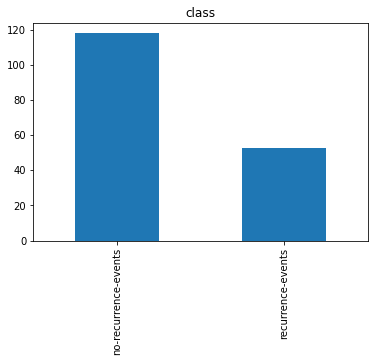

In [26]:
cancer_set_for_training90, cancer_testing90 = data_utils.data_split(cancer_dataset, 90)
cancer_training90, cancer_validation90 = data_utils.split_training_data_for_pruning(cancer_set_for_training90)
print(cancer_training90['CLASS'].value_counts())
cancer_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

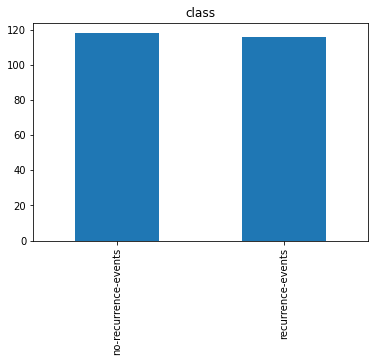

In [27]:

#Target for all 174
resampling_cancer90 = cancer_training90.copy()
recurrence_events_part90 = resampling_cancer90[resampling_cancer90['CLASS'] == 'recurrence-events']
no_recurrence_events_part90 = resampling_cancer90[resampling_cancer90['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled90 = resample(recurrence_events_part90, 
                                 replace=True,     
                                 n_samples=116)

# Combine majority class with upsamplet minority class
balanced_cnacer_training90 = pd.concat([recurrence_events_part_upsampled90, no_recurrence_events_part90])
balanced_cnacer_training90 = balanced_cnacer_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training90 = balanced_cnacer_training90.sample(frac=1).reset_index(drop=True)

cancer_training90 = balanced_cnacer_training90.copy()
cancer_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [28]:
train_tree_for_different_heuristics(cancer_training70, cancer_testing70, cancer_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 60.47% | training 98.95% | levels 12 | leafs 75
After Pruning:
Accuracy for: testing 61.63% | training 88.42% | levels 10 | leafs 47


Before Pruning - heuristic = info_gain
Accuracy for: testing 55.81% | training 98.95% | levels 14 | leafs 70
After Pruning:
Accuracy for: testing 56.98% | training 83.16% | levels 14 | leafs 40


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 52.33% | training 98.95% | levels 14 | leafs 71
After Pruning:
Accuracy for: testing 77.91% | training 62.63% | levels 4 | leafs 3


Before Pruning - heuristic = distance_measure
Accuracy for: testing 46.51% | training 74.74% | levels 16 | leafs 68
After Pruning:
Accuracy for: testing 73.26% | training 51.58% | levels 2 | leafs 2


Before Pruning - heuristic = j_measure
Accuracy for: testing 56.98% | training 98.95% | levels 14 | leafs 69
After Pruning:
Accuracy for: testing 56.98% | training 83.16% | levels 14 | le

In [29]:
train_tree_for_different_heuristics(cancer_training80, cancer_testing80, cancer_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 67.24% | training 98.03% | levels 14 | leafs 78
After Pruning:
Accuracy for: testing 79.31% | training 71.43% | levels 6 | leafs 13


Before Pruning - heuristic = info_gain
Accuracy for: testing 60.34% | training 98.03% | levels 14 | leafs 75
After Pruning:
Accuracy for: testing 68.97% | training 88.67% | levels 12 | leafs 47


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 65.52% | training 98.52% | levels 18 | leafs 73
After Pruning:
Accuracy for: testing 89.66% | training 79.31% | levels 14 | leafs 21


Before Pruning - heuristic = distance_measure
Accuracy for: testing 75.86% | training 71.92% | levels 14 | leafs 47
After Pruning:
Accuracy for: testing 74.14% | training 52.71% | levels 2 | leafs 3


Before Pruning - heuristic = j_measure
Accuracy for: testing 60.34% | training 98.03% | levels 14 | leafs 74
After Pruning:
Accuracy for: testing 68.97% | training 88.67% | levels 12 | l

In [30]:
train_tree_for_different_heuristics(cancer_training90, cancer_testing90, cancer_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 62.07% | training 96.15% | levels 12 | leafs 93
After Pruning:
Accuracy for: testing 79.31% | training 66.67% | levels 2 | leafs 2


Before Pruning - heuristic = info_gain
Accuracy for: testing 65.52% | training 97.01% | levels 12 | leafs 98
After Pruning:
Accuracy for: testing 75.86% | training 73.08% | levels 12 | leafs 25


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 68.97% | training 96.58% | levels 16 | leafs 87
After Pruning:
Accuracy for: testing 79.31% | training 68.38% | levels 6 | leafs 6


Before Pruning - heuristic = distance_measure
Accuracy for: testing 55.17% | training 81.20% | levels 16 | leafs 101
After Pruning:
Accuracy for: testing 68.97% | training 61.54% | levels 16 | leafs 23


Before Pruning - heuristic = j_measure
Accuracy for: testing 65.52% | training 97.01% | levels 12 | leafs 93
After Pruning:
Accuracy for: testing 75.86% | training 73.08% | levels 12 | l

# CMC Dataset

## Dataset preparation

In [31]:
cmc_dataset_path = 'data/cmc.data'
cmc_dataset_labels = ['age','education','husbandEducation','noChildren','religion','isWorking','husbandOccupation','livingStandard', 'mediaExposure', 'CLASS']
cmc_dataset = data_utils.preapare_dataset(cmc_dataset_path, cmc_dataset_labels)
# cmc_dataset['CLASS'] = cmc_dataset['CLASS'].apply(str)
cmc_dataset.head()

,age,education,husbandEducation,noChildren,religion,isWorking,husbandOccupation,livingStandard,mediaExposure,CLASS
0,35,3,3,6,1,1,2,3,0,2
1,44,3,3,9,1,1,1,1,0,2
2,25,4,4,0,1,0,3,4,0,1
3,33,2,3,4,1,1,2,3,0,3
4,30,4,4,2,1,1,1,4,0,3


In [32]:
vals_to_replace_education = {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_husbandEducation = {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_religion = {0: 'Non-Islam', 1:'Islam'}
vals_to_replace_isWorking = {0: 'Yes', 1:'No'}
vals_to_replace_livingStandard= {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_mediaExposure = {0: 'Good', 1:'Not good'}
vals_to_replace_CLASS = {1: 'No-use', 2:'Long-term', 3: 'Short-term'}
cmc_dataset['education'] = cmc_dataset['education'].map(vals_to_replace_education)
cmc_dataset['husbandEducation'] = cmc_dataset['husbandEducation'].map(vals_to_replace_husbandEducation)
cmc_dataset['religion'] = cmc_dataset['religion'].map(vals_to_replace_religion)
cmc_dataset['isWorking'] = cmc_dataset['isWorking'].map(vals_to_replace_isWorking)
cmc_dataset['livingStandard'] = cmc_dataset['livingStandard'].map(vals_to_replace_livingStandard)
cmc_dataset['mediaExposure'] = cmc_dataset['mediaExposure'].map(vals_to_replace_mediaExposure)
cmc_dataset['CLASS'] = cmc_dataset['CLASS'].map(vals_to_replace_CLASS)
cmc_dataset.head()

,age,education,husbandEducation,noChildren,religion,isWorking,husbandOccupation,livingStandard,mediaExposure,CLASS
0,35,normal,normal,6,Islam,No,2,normal,Good,Long-term
1,44,normal,normal,9,Islam,No,1,low,Good,Long-term
2,25,high,high,0,Islam,Yes,3,high,Good,No-use
3,33,medium,normal,4,Islam,No,2,normal,Good,Short-term
4,30,high,high,2,Islam,No,1,high,Good,Short-term


### Cmc 70%

No-use        301
Short-term    231
Long-term     155
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

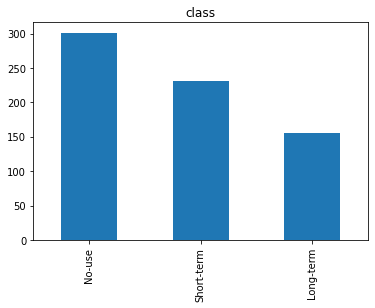

In [33]:
cmc_set_for_training70, cmc_testing70 = data_utils.data_split(cmc_dataset, 70)
cmc_training70, cmc_validation70 = data_utils.split_training_data_for_pruning(cmc_set_for_training70)
print(cmc_training70['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training70['CLASS'].value_counts().plot(kind='bar', title='class')

## Cmc 80%

No-use        341
Short-term    269
Long-term     175
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

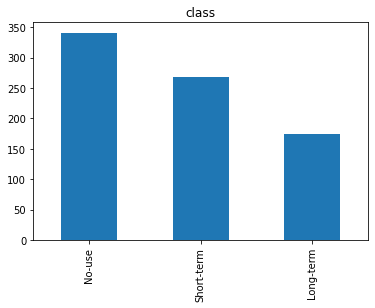

In [34]:
cmc_set_for_training80, cmc_testing80 = data_utils.data_split(cmc_dataset, 80)
cmc_training80, cmc_validation80 = data_utils.split_training_data_for_pruning(cmc_set_for_training80)
print(cmc_training80['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training80['CLASS'].value_counts().plot(kind='bar', title='class')

## Cmc 90%

No-use        383
Short-term    306
Long-term     194
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

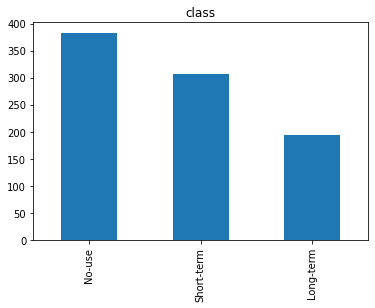

In [35]:
cmc_set_for_training90, cmc_testing90 = data_utils.data_split(cmc_dataset, 90)
cmc_training90, cmc_validation90 = data_utils.split_training_data_for_pruning(cmc_set_for_training90)
print(cmc_training90['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [36]:
train_tree_for_different_heuristics(cmc_training70, cmc_testing70, cmc_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 52.94% | training 80.49% | levels 24 | leafs 189
After Pruning:
Accuracy for: testing 51.81% | training 66.67% | levels 20 | leafs 74


Before Pruning - heuristic = info_gain
Accuracy for: testing 44.80% | training 71.32% | levels 40 | leafs 224
After Pruning:
Accuracy for: testing 45.48% | training 57.50% | levels 34 | leafs 110


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 45.48% | training 70.60% | levels 40 | leafs 211
After Pruning:
Accuracy for: testing 44.34% | training 56.62% | levels 34 | leafs 118


Before Pruning - heuristic = distance_measure
Accuracy for: testing 37.10% | training 56.04% | levels 24 | leafs 156
After Pruning:
Accuracy for: testing 42.53% | training 49.34% | levels 24 | leafs 54


Before Pruning - heuristic = j_measure
Accuracy for: testing 44.80% | training 71.32% | levels 40 | leafs 224
After Pruning:
Accuracy for: testing 45.48% | training 57.50% | lev

In [37]:
train_tree_for_different_heuristics(cmc_training80, cmc_testing80, cmc_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 48.47% | training 78.09% | levels 26 | leafs 185
After Pruning:
Accuracy for: testing 51.19% | training 68.92% | levels 26 | leafs 93


Before Pruning - heuristic = info_gain
Accuracy for: testing 46.78% | training 68.66% | levels 44 | leafs 221
After Pruning:
Accuracy for: testing 46.44% | training 57.45% | levels 34 | leafs 126


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 46.10% | training 69.94% | levels 44 | leafs 223
After Pruning:
Accuracy for: testing 46.44% | training 58.22% | levels 36 | leafs 131


Before Pruning - heuristic = distance_measure
Accuracy for: testing 40.00% | training 56.94% | levels 38 | leafs 175
After Pruning:
Accuracy for: testing 47.12% | training 53.50% | levels 38 | leafs 131


Before Pruning - heuristic = j_measure
Accuracy for: testing 46.78% | training 68.66% | levels 44 | leafs 221
After Pruning:
Accuracy for: testing 46.44% | training 57.45% | le

In [38]:
train_tree_for_different_heuristics(cmc_training90, cmc_testing90, cmc_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 47.97% | training 76.78% | levels 26 | leafs 203
After Pruning:
Accuracy for: testing 49.32% | training 65.35% | levels 22 | leafs 84


Before Pruning - heuristic = info_gain
Accuracy for: testing 45.27% | training 65.23% | levels 48 | leafs 215
After Pruning:
Accuracy for: testing 39.86% | training 57.64% | levels 48 | leafs 139


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 41.22% | training 64.89% | levels 48 | leafs 214
After Pruning:
Accuracy for: testing 38.51% | training 56.63% | levels 48 | leafs 133


Before Pruning - heuristic = distance_measure
Accuracy for: testing 32.43% | training 56.51% | levels 38 | leafs 181
After Pruning:
Accuracy for: testing 38.51% | training 49.04% | levels 24 | leafs 74


Before Pruning - heuristic = j_measure
Accuracy for: testing 45.27% | training 65.23% | levels 48 | leafs 215
After Pruning:
Accuracy for: testing 39.86% | training 57.64% | lev

# Adult Dataset

## Data preparation

In [39]:
adult_dataset_path = 'data/adult.data'
adult_dataset_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hourse-per-week','native-country','CLASS']
adult_dataset = data_utils.preapare_dataset(adult_dataset_path, adult_dataset_labels)
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hourse-per-week,native-country,CLASS
0,48,Local-gov,328610,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
1,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,55,Private,28735,HS-grad,9,Divorced,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,0,0,45,United-States,<=50K
3,37,Self-emp-inc,26698,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,>50K
4,39,Private,37314,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,>50K


In [40]:
adult_dataset = adult_dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','hourse-per-week', 'native-country' ,'CLASS']]

for element in list(adult_dataset):
    if adult_dataset[element].dtype not in [np.float64, np.int64]:
        adult_dataset[element] = adult_dataset[element].str.strip()

adult_dataset['CLASS'] = adult_dataset['CLASS'].str.strip()
adult_dataset.head()
adult_dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hourse-per-week,native-country,CLASS
0,48,Local-gov,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,United-States,>50K
1,62,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,<=50K
2,55,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,45,United-States,<=50K
3,37,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,44,United-States,>50K
4,39,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,33,Private,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,40,Philippines,<=50K
32557,38,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,Black,Male,40,United-States,>50K
32558,23,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,25,United-States,<=50K
32559,22,?,Some-college,10,Never-married,?,Own-child,White,Female,20,United-States,<=50K


In [41]:
adult_dataset.dropna(how='any', axis=0)
indexNames = adult_dataset[(adult_dataset['workclass'] == '?') | (adult_dataset['education'] == '?') | (adult_dataset['marital-status'] == '?') | (adult_dataset['occupation'] == '?') | (adult_dataset['relationship'] == '?') | (adult_dataset['race'] == '?') | (adult_dataset['sex'] == '?') | (adult_dataset['native-country'] == '?') ].index
# print(indexNames)
adult_dataset.drop(indexNames, inplace=True)
adult_dataset.head()
adult_dataset.reset_index(inplace=True)
adult_dataset

,index,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hourse-per-week,native-country,CLASS
0,0,48,Local-gov,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,United-States,>50K
1,1,62,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,<=50K
2,2,55,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,45,United-States,<=50K
3,3,37,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,44,United-States,>50K
4,4,39,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,32554,24,Private,HS-grad,9,Never-married,Farming-fishing,Own-child,Black,Male,50,United-States,<=50K
30158,32555,37,Private,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,40,United-States,<=50K
30159,32556,33,Private,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,40,Philippines,<=50K
30160,32557,38,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,Black,Male,40,United-States,>50K


### Adult 70%

<=50K    10543
>50K      3532
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

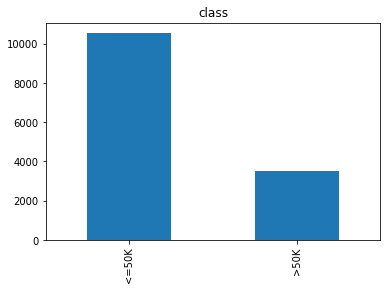

In [51]:
adult_set_for_training70, adult_testing70 = data_utils.data_split(adult_dataset, 70)
adult_training70, adult_validation70 = data_utils.split_training_data_for_pruning(adult_set_for_training70)

print(adult_training70['CLASS'].value_counts())
adult_training70['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

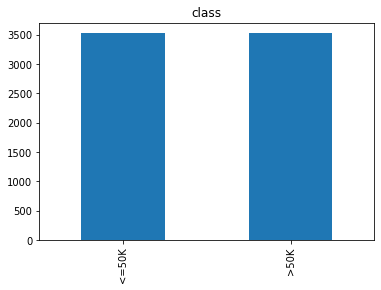

In [52]:
resampling_adult70 = adult_training70.copy()
less_50k_part70 = resampling_adult70[resampling_adult70['CLASS'] == '<=50K']
more_50k_part70 = resampling_adult70[resampling_adult70['CLASS'] == '>50K'] 

less_50k_part_downsampled70 = resample(less_50k_part70, 
                                 replace=False,    
                                 n_samples=3532)

# Combine minority class with downsampled majority class
balanced_adult_training70 = pd.concat([less_50k_part_downsampled70, more_50k_part70])
balanced_adult_training70 = balanced_adult_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training70 = balanced_adult_training70.sample(frac=1).reset_index(drop=True)

adult_training70 = balanced_adult_training70.copy()
adult_training70['CLASS'].value_counts().plot(kind='bar', title='class')

### Adult 80%

<=50K    12083
>50K      4002
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

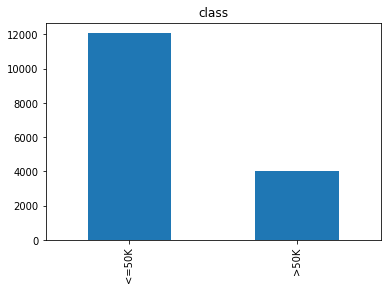

In [57]:
adult_set_for_training80, adult_testing80 = data_utils.data_split(adult_dataset, 80)
adult_training80, adult_validation80 = data_utils.split_training_data_for_pruning(adult_set_for_training80)

print(adult_training80['CLASS'].value_counts())
adult_training80['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

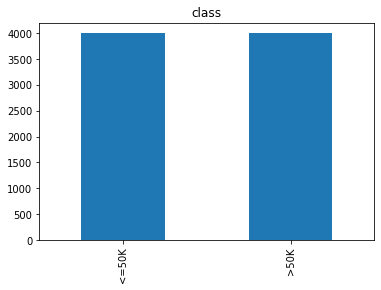

In [58]:
resampling_adult80 = adult_training80.copy()
less_50k_part80 = resampling_adult80[resampling_adult80['CLASS'] == '<=50K']
more_50k_part80 = resampling_adult80[resampling_adult80['CLASS'] == '>50K'] 

less_50k_part_downsampled80 = resample(less_50k_part80, 
                                 replace=False,    
                                 n_samples=4002)

# Combine minority class with downsampled majority class
balanced_adult_training80 = pd.concat([less_50k_part_downsampled80, more_50k_part80])
balanced_adult_training80 = balanced_adult_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training80 = balanced_adult_training80.sample(frac=1).reset_index(drop=True)

adult_training80 = balanced_adult_training80.copy()
adult_training80['CLASS'].value_counts().plot(kind='bar', title='class')

### Adult 90%

<=50K    13606
>50K      4490
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

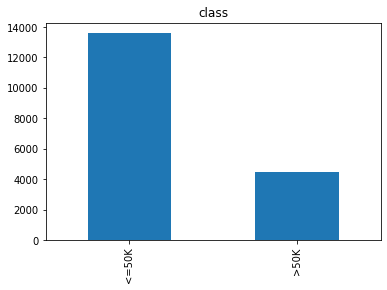

In [46]:
adult_set_for_training90, adult_testing90 = data_utils.data_split(adult_dataset, 90)
adult_training90, adult_validation90 = data_utils.split_training_data_for_pruning(adult_set_for_training90)

print(adult_training90['CLASS'].value_counts())
adult_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

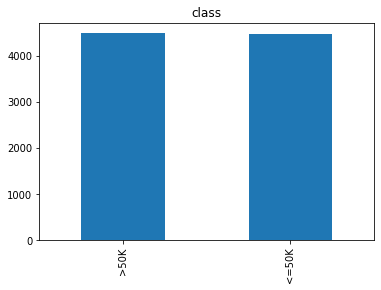

In [47]:
resampling_adult90 = adult_training90.copy()
less_50k_part90 = resampling_adult90[resampling_adult90['CLASS'] == '<=50K']
more_50k_part90 = resampling_adult90[resampling_adult90['CLASS'] == '>50K'] 

less_50k_part_downsampled90 = resample(less_50k_part90, 
                                 replace=False,    
                                 n_samples=4469)

# Combine minority class with downsampled majority class
balanced_adult_training90 = pd.concat([less_50k_part_downsampled90, more_50k_part90])
balanced_adult_training90 = balanced_adult_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training90 = balanced_adult_training90.sample(frac=1).reset_index(drop=True)

adult_training90 = balanced_adult_training90.copy()
adult_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [53]:
train_tree_for_different_heuristics(adult_training70, adult_testing70, adult_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 76.73% | training 81.68% | levels 22 | leafs 514
After Pruning:
Accuracy for: testing 79.78% | training 80.41% | levels 20 | leafs 202


Before Pruning - heuristic = info_gain
Accuracy for: testing 72.76% | training 53.36% | levels 52 | leafs 309
After Pruning:
Accuracy for: testing 74.81% | training 51.63% | levels 52 | leafs 137


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 72.76% | training 53.36% | levels 52 | leafs 309
After Pruning:
Accuracy for: testing 74.81% | training 51.63% | levels 52 | leafs 137


Before Pruning - heuristic = distance_measure
Accuracy for: testing 70.73% | training 68.77% | levels 16 | leafs 271
After Pruning:
Accuracy for: testing 73.83% | training 58.34% | levels 12 | leafs 102


Before Pruning - heuristic = j_measure
Accuracy for: testing 72.76% | training 53.36% | levels 52 | leafs 309
After Pruning:
Accuracy for: testing 74.81% | training 51.63% | l

In [59]:
train_tree_for_different_heuristics(adult_training80, adult_testing80, adult_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 75.92% | training 81.80% | levels 22 | leafs 507
After Pruning:
Accuracy for: testing 78.55% | training 79.97% | levels 18 | leafs 180


Before Pruning - heuristic = info_gain
Accuracy for: testing 71.56% | training 53.44% | levels 66 | leafs 290
After Pruning:
Accuracy for: testing 74.23% | training 53.37% | levels 66 | leafs 279


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 71.56% | training 53.44% | levels 66 | leafs 290
After Pruning:
Accuracy for: testing 74.23% | training 53.37% | levels 66 | leafs 279


Before Pruning - heuristic = distance_measure
Accuracy for: testing 70.78% | training 71.84% | levels 14 | leafs 345
After Pruning:
Accuracy for: testing 73.55% | training 58.26% | levels 14 | leafs 104


Before Pruning - heuristic = j_measure
Accuracy for: testing 71.56% | training 53.44% | levels 66 | leafs 290
After Pruning:
Accuracy for: testing 74.23% | training 53.37% | l

In [50]:
train_tree_for_different_heuristics(adult_training90, adult_testing90, adult_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 75.14% | training 80.90% | levels 20 | leafs 603
After Pruning:
Accuracy for: testing 78.75% | training 79.09% | levels 20 | leafs 177


Before Pruning - heuristic = info_gain
Accuracy for: testing 69.80% | training 53.95% | levels 58 | leafs 311
After Pruning:
Accuracy for: testing 74.38% | training 53.76% | levels 58 | leafs 277


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 69.80% | training 53.95% | levels 58 | leafs 311
After Pruning:
Accuracy for: testing 74.38% | training 53.76% | levels 58 | leafs 277


Before Pruning - heuristic = distance_measure
Accuracy for: testing 68.45% | training 71.59% | levels 12 | leafs 441
After Pruning:
Accuracy for: testing 73.02% | training 58.03% | levels 12 | leafs 126


Before Pruning - heuristic = j_measure
Accuracy for: testing 69.80% | training 53.95% | levels 58 | leafs 311
After Pruning:
Accuracy for: testing 74.38% | training 53.76% | l